###Práctica 2 (el perfil de los clientes de un banco)

**Objetivo**

La sucursal del Banco Santander situada en el campus de la Universidad Francisco de Vitoria nos solicita hacer varios estudios de sus clientes. 

Para ello haremos uso de un dataset proporcionado por la propia sucursal que 
se puede encontrar en Moodle.

##Apartado 1

In [50]:
import numpy as np 
import pandas as pd 
import sklearn as sk
import matplotlib.pyplot as plt

data = pd.read_csv('banco_ufv.csv',sep=';')


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [52]:
df=data[['age','education','balance','duration']]

In [53]:
df.head()

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,47,unknown,1506,92
4,33,unknown,1,198


¿Está el nivel de estudios está directamente relacionado con el saldo de cada cliente en la cuenta?

Para ello estableceremos 3 rangos numéricos: los que tienen deudas, la gente que tiene unos ahorros normales (en positivo, pero menos de 10.000 euros) y los que disponen de suficientes ahorros como para ofrecerles paquetes de inversión (aquellos en positivo con más de 10.000 euros). 

Primero, analizaremos los valores NaN que contenga la columna que contiene el nivel de educación de los clientes.



In [54]:
df['education'].isna().sum()

0

Ahora que hemos comprobado que no hay ningún valor faltante veamos cuántos niveles de educación están expresados para ver cómo mejor proceder.



In [55]:
df['education'].value_counts()


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Ahora, sabemos que para los niveles de educación de los clientes, hay 4 categorías distintas posibles.
Nivel de educación:


1.   Primaria        
2.   Secundaria      
3.   Terciaria       
4.   Desconocida     

###Cómo lidiar con datos faltantes

Según el proceso CRISP-DM (Cross-Industry Standard Process for Data Mining), las opciones para lidiar con datos faltantes en bases de datos son las siguientes:
1.	Eliminación: Eliminar las filas o columnas con datos faltantes.
2.	Imputación: Reemplazar los valores faltantes con valores estimados o calculados. Por ejemplo, la imputación media o mediana puede ser utilizada para reemplazar los valores faltantes en una columna con el valor promedio o mediana de esa columna.
3.	Interpolación: Interpolar los valores faltantes utilizando una técnica de estimación, como la interpolación lineal o spline.
4.	Modelos predictivos: Utilizar modelos predictivos para estimar los valores faltantes a partir de los datos disponibles.
5.	Algoritmos de aprendizaje no supervisado: Utilizar algoritmos de clustering o de reducción de dimensionalidad para identificar patrones en los datos y utilizarlos para estimar los valores faltantes.
Es importante elegir la técnica adecuada para lidiar con los datos faltantes, considerando el tipo de datos, la cantidad de datos faltantes y su impacto en los resultados de análisis. Es recomendable investigar y evaluar varias opciones antes de tomar una decisión.



Ahora, tenemos que decidir cómo vamos a gestionar aquellos clientes cuyo nivel de educación es desconocido. 

Debido a que nuestro primer problema trata de ilustrar la correlación entre el nivel de educación y el dinero que tienen, es importante que hagamos algo con ellos en mente.

Desconocemos la razón por la cual esta infomación es desconocida, agravado por el hecho de desconocer el criterio usado para agrupar a la gente en dichos niveles. 

¿Tendrán un nivel de educación inferior al requerido para poder haber obtenido el nivel primario? Tal vez no querían divulgar dicha información...



Existen varias opciones respecto a como lidiar con NaN.
Una opción (que intentaremos evitar) pero a la que haremos mención sería ver si podríamos eliminar aquellos clientes con nivel de educación desconocida.

In [56]:
df['education'].value_counts().sum()

45211

In [57]:
print("Porcentage de todos los clientes con nivel de educación desconocido: {:.2f}%".format((1857/45211)*100))

Porcentage de todos los clientes con nivel de educación desconocido: 4.11%


Separaremos los datos 

Decidimos eliminar los valores

Ya sabemos que tendremos que agrupar a los clientes en 3 rangos numéricos según el dinero que actualmente tengan en su cuenta de banco, pero previo a visualizar los datos, 

In [58]:
filas=len(df.axes[0])
for i in range (filas):
  if df['balance'][i]<0:
    df['balance'][i]='Endeudados'
  elif df['balance'][i]<10000:
    df['balance'][i]='Balance Positivo'
  else:
    df['balance'][i]='Potencial Paquete de Inversion'

<ipython-input-58-0ce4ef6bfbca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balance'][i]='Balance Positivo'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chaine

In [59]:
df.head()

,age,education,balance,duration
0,58,tertiary,Balance Positivo,261
1,44,secondary,Balance Positivo,151
2,33,secondary,Balance Positivo,76
3,47,unknown,Balance Positivo,92
4,33,unknown,Balance Positivo,198


In [60]:
df['balance'].value_counts()

Balance Positivo                  40616
Endeudados                         3766
Potencial Paquete de Inversion      829
Name: balance, dtype: int64

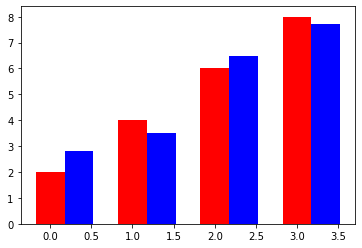

In [65]:
import matplotlib.pyplot as plt
import numpy as np
A=[2,4,6,8]
B=[2.8,3.5,6.5,7.7]

X=np.arange(len(A))
plt.bar(X,A,color="red",width=0.35)
plt.bar(X+0.35,B,color="blue",width=0.35)
plt.show()


¿Qué diagrama has usado y por qué? 


¿Cuál es el grupo que más destaca? 

Aporta toda la información que creas necesaria que puedes obtener de la gráfica.

##Apartado 2

¿Cuál es el grupo de edad que tiene más clientes?

Esto nos permitirá saber si los alumnos usan la cuenta creada a través de la Universidad o no.

##Apartado 3